In [ ]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Flatten,Reshape,TimeDistributed, Conv2D
import cv2
import os
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
DatasetPath='/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/'
Folders = os.listdir(DatasetPath)
folders=sorted(Folders)
folders

['character_01_ka',
 'character_02_kha',
 'character_03_ga',
 'character_04_gha',
 'character_05_kna',
 'character_06_cha',
 'character_07_chha',
 'character_08_ja',
 'character_09_jha',
 'character_10_yna',
 'character_11_taamatar',
 'character_12_thaa',
 'character_13_daa',
 'character_14_dhaa',
 'character_15_adna',
 'character_16_tabala',
 'character_17_tha',
 'character_18_da',
 'character_19_dha',
 'character_20_na',
 'character_21_pa',
 'character_22_pha',
 'character_23_ba',
 'character_24_bha',
 'character_25_ma',
 'character_26_yaw',
 'character_27_ra',
 'character_28_la',
 'character_29_waw',
 'character_30_motosaw',
 'character_31_petchiryakha',
 'character_32_patalosaw',
 'character_33_ha',
 'character_34_chhya',
 'character_35_tra',
 'character_36_gya',
 'digit_0',
 'digit_1',
 'digit_2',
 'digit_3',
 'digit_4',
 'digit_5',
 'digit_6',
 'digit_7',
 'digit_8',
 'digit_9']

In [ ]:
# labels = [i for i in range(len(folders))]

#labelDirectory = dict(zip(folders, labels))
labels = [char.split('_')[-1] for char in folders]

print(labels)

['ka', 'kha', 'ga', 'gha', 'kna', 'cha', 'chha', 'ja', 'jha', 'yna', 'taamatar', 'thaa', 'daa', 'dhaa', 'adna', 'tabala', 'tha', 'da', 'dha', 'na', 'pa', 'pha', 'ba', 'bha', 'ma', 'yaw', 'ra', 'la', 'waw', 'motosaw', 'petchiryakha', 'patalosaw', 'ha', 'chhya', 'tra', 'gya', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


In [ ]:
data = []
label = []

for category in folders:
    path = os.path.join(DatasetPath, category)
    imgName = os.listdir(path)
    for iName in imgName:
        imagePath = os.path.join(path, iName)
        image = cv2.imread(imagePath)
        try:

            blurred_image = cv2.GaussianBlur(image, (5, 5), 0)

            # Add the original image and the blurred image to sharpening
            sharpened_image = cv2.addWeighted(image, 1.5, blurred_image, -0.5, 0)

            gray = cv2.cvtColor(sharpened_image, cv2.COLOR_BGR2GRAY)

            # Resize the sharpened image to the specified size
            resized = cv2.resize(gray, (32, 32))

            # Normalize the pixel values to the [0, 1] range
            resized = resized.astype('float32') / 255.0



            # Append the preprocessed and sharpened image and its label to the data and label lists
            data.append(resized)
            print(imagePath)
            print(category)
            label.append(category)

        except Exception as e:
            print('exception')
            print(e)


Streaming output truncated to the last 5000 lines.
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/43932.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/68345.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/50015.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/50037.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/99360.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/30610.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/5878.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/78777.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDatasets/Images/digit_8/42136.png
digit_8
/content/drive/My Drive/DevnagariCharacterDetection/FinalDa

In [ ]:
data=np.array(data)

In [ ]:
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
label_encoder = LabelEncoder()
newLabel = label_encoder.fit_transform(label)
newLabel = to_categorical(newLabel)
newLabel

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)

In [ ]:
data.shape

(64904, 32, 32)

In [ ]:
# reshapedData = data.reshape(data.shape[0], data.shape[1],data.shape[2])

# reshapedData.shape

In [ ]:
model = Sequential()
model.add(LSTM(64, return_sequences=True,input_shape=data.shape[1:]))
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(Dense(len(folders), activation='softmax'))

In [ ]:

optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.001)
model.compile(
    optimizer=optimizer,
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 32, 64)            24832     
                                                                 
 lstm_1 (LSTM)               (None, 128)               98816     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 46)                5934      
                                                                 
Total params: 129582 (506.18 KB)
Trainable params: 129582 (506.18 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
early_stopping = EarlyStopping(
      monitor='val_accuracy',
      min_delta=0,
      patience=5,
      verbose=1,
      mode='max',
      restore_best_weights=True
  )

In [ ]:
checkpoint = ModelCheckpoint(
     '/content/drive/My Drive/DevnagariCharacterDetection/Weights/LSTM2adam.h5',
      monitor='val_accuracy',
      verbose=1,
      save_best_only=True,
      mode='max'
  )

In [ ]:
xTrain , xTest, yTrain, yTest =train_test_split(data, newLabel, test_size=0.2, random_state=42)
with tf.device('/cpu:0'):
  history = model.fit(xTrain,yTrain,epochs=100,validation_split=0.1,callbacks=[early_stopping, checkpoint])

Epoch 1/100
1460/1461 [============================>.] - ETA: 0s - loss: 1.4139 - accuracy: 0.6147
Epoch 1: val_accuracy improved from -inf to 0.79395, saving model to /content/drive/My Drive/DevnagariCharacterDetection/Weights/LSTM2adam.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1461/1461 [==============================] - 108s 70ms/step - loss: 1.4138 - accuracy: 0.6148 - val_loss: 0.7014 - val_accuracy: 0.7940
Epoch 2/100
1461/1461 [==============================] - ETA: 0s - loss: 0.5138 - accuracy: 0.8511
Epoch 2: val_accuracy improved from 0.79395 to 0.88542, saving model to /content/drive/My Drive/DevnagariCharacterDetection/Weights/LSTM2adam.h5
1461/1461 [==============================] - 102s 70ms/step - loss: 0.5138 - accuracy: 0.8511 - val_loss: 0.3838 - val_accuracy: 0.8854
Epoch 3/100
1460/1461 [============================>.] - ETA: 0s - loss: 0.3221 - accuracy: 0.9070
Epoch 3: val_accuracy improved from 0.88542 to 0.91450, saving model to /content/drive/My Drive/DevnagariCharacterDetection/Weights/LSTM2adam.h5
1461/1461 [==============================] - 101s 69ms/step - loss: 0.3222 - accuracy: 0.9070 - val_loss: 0.2856 - val_accuracy: 0.9145
Epoch 4/100
1460/1461 [============================>.] - ETA: 0s - loss: 0.2357 - accuracy: 0.9314
Epoch

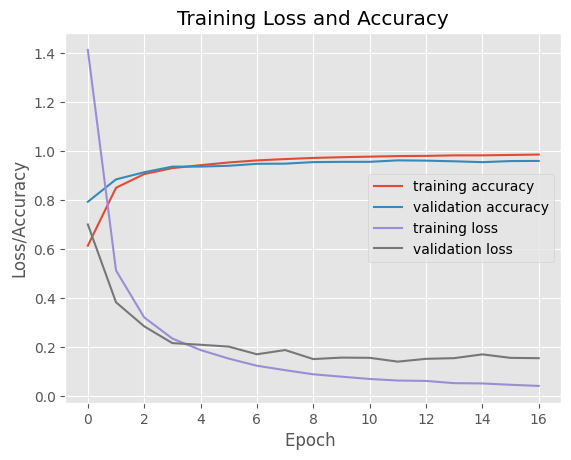

In [ ]:
import matplotlib.pyplot as plt
N=17
plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0, N), history.history["accuracy"], label="training accuracy")
plt.plot(np.arange(0, N), history.history["val_accuracy"], label="validation accuracy")
plt.plot(np.arange(0, N), history.history["loss"], label="training loss")
plt.plot(np.arange(0, N), history.history["val_loss"], label="validation loss")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch ")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="center right")
plt.savefig("/content/drive/My Drive/DevnagariCharacterDetection/Figures/LSTM2Adamfig")

In [ ]:
model.save("/content/drive/My Drive/DevnagariCharacterDetection/Models/LSTM2adam.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


406/406 [==============================] - 8s 20ms/step


<Figure size 640x480 with 0 Axes>

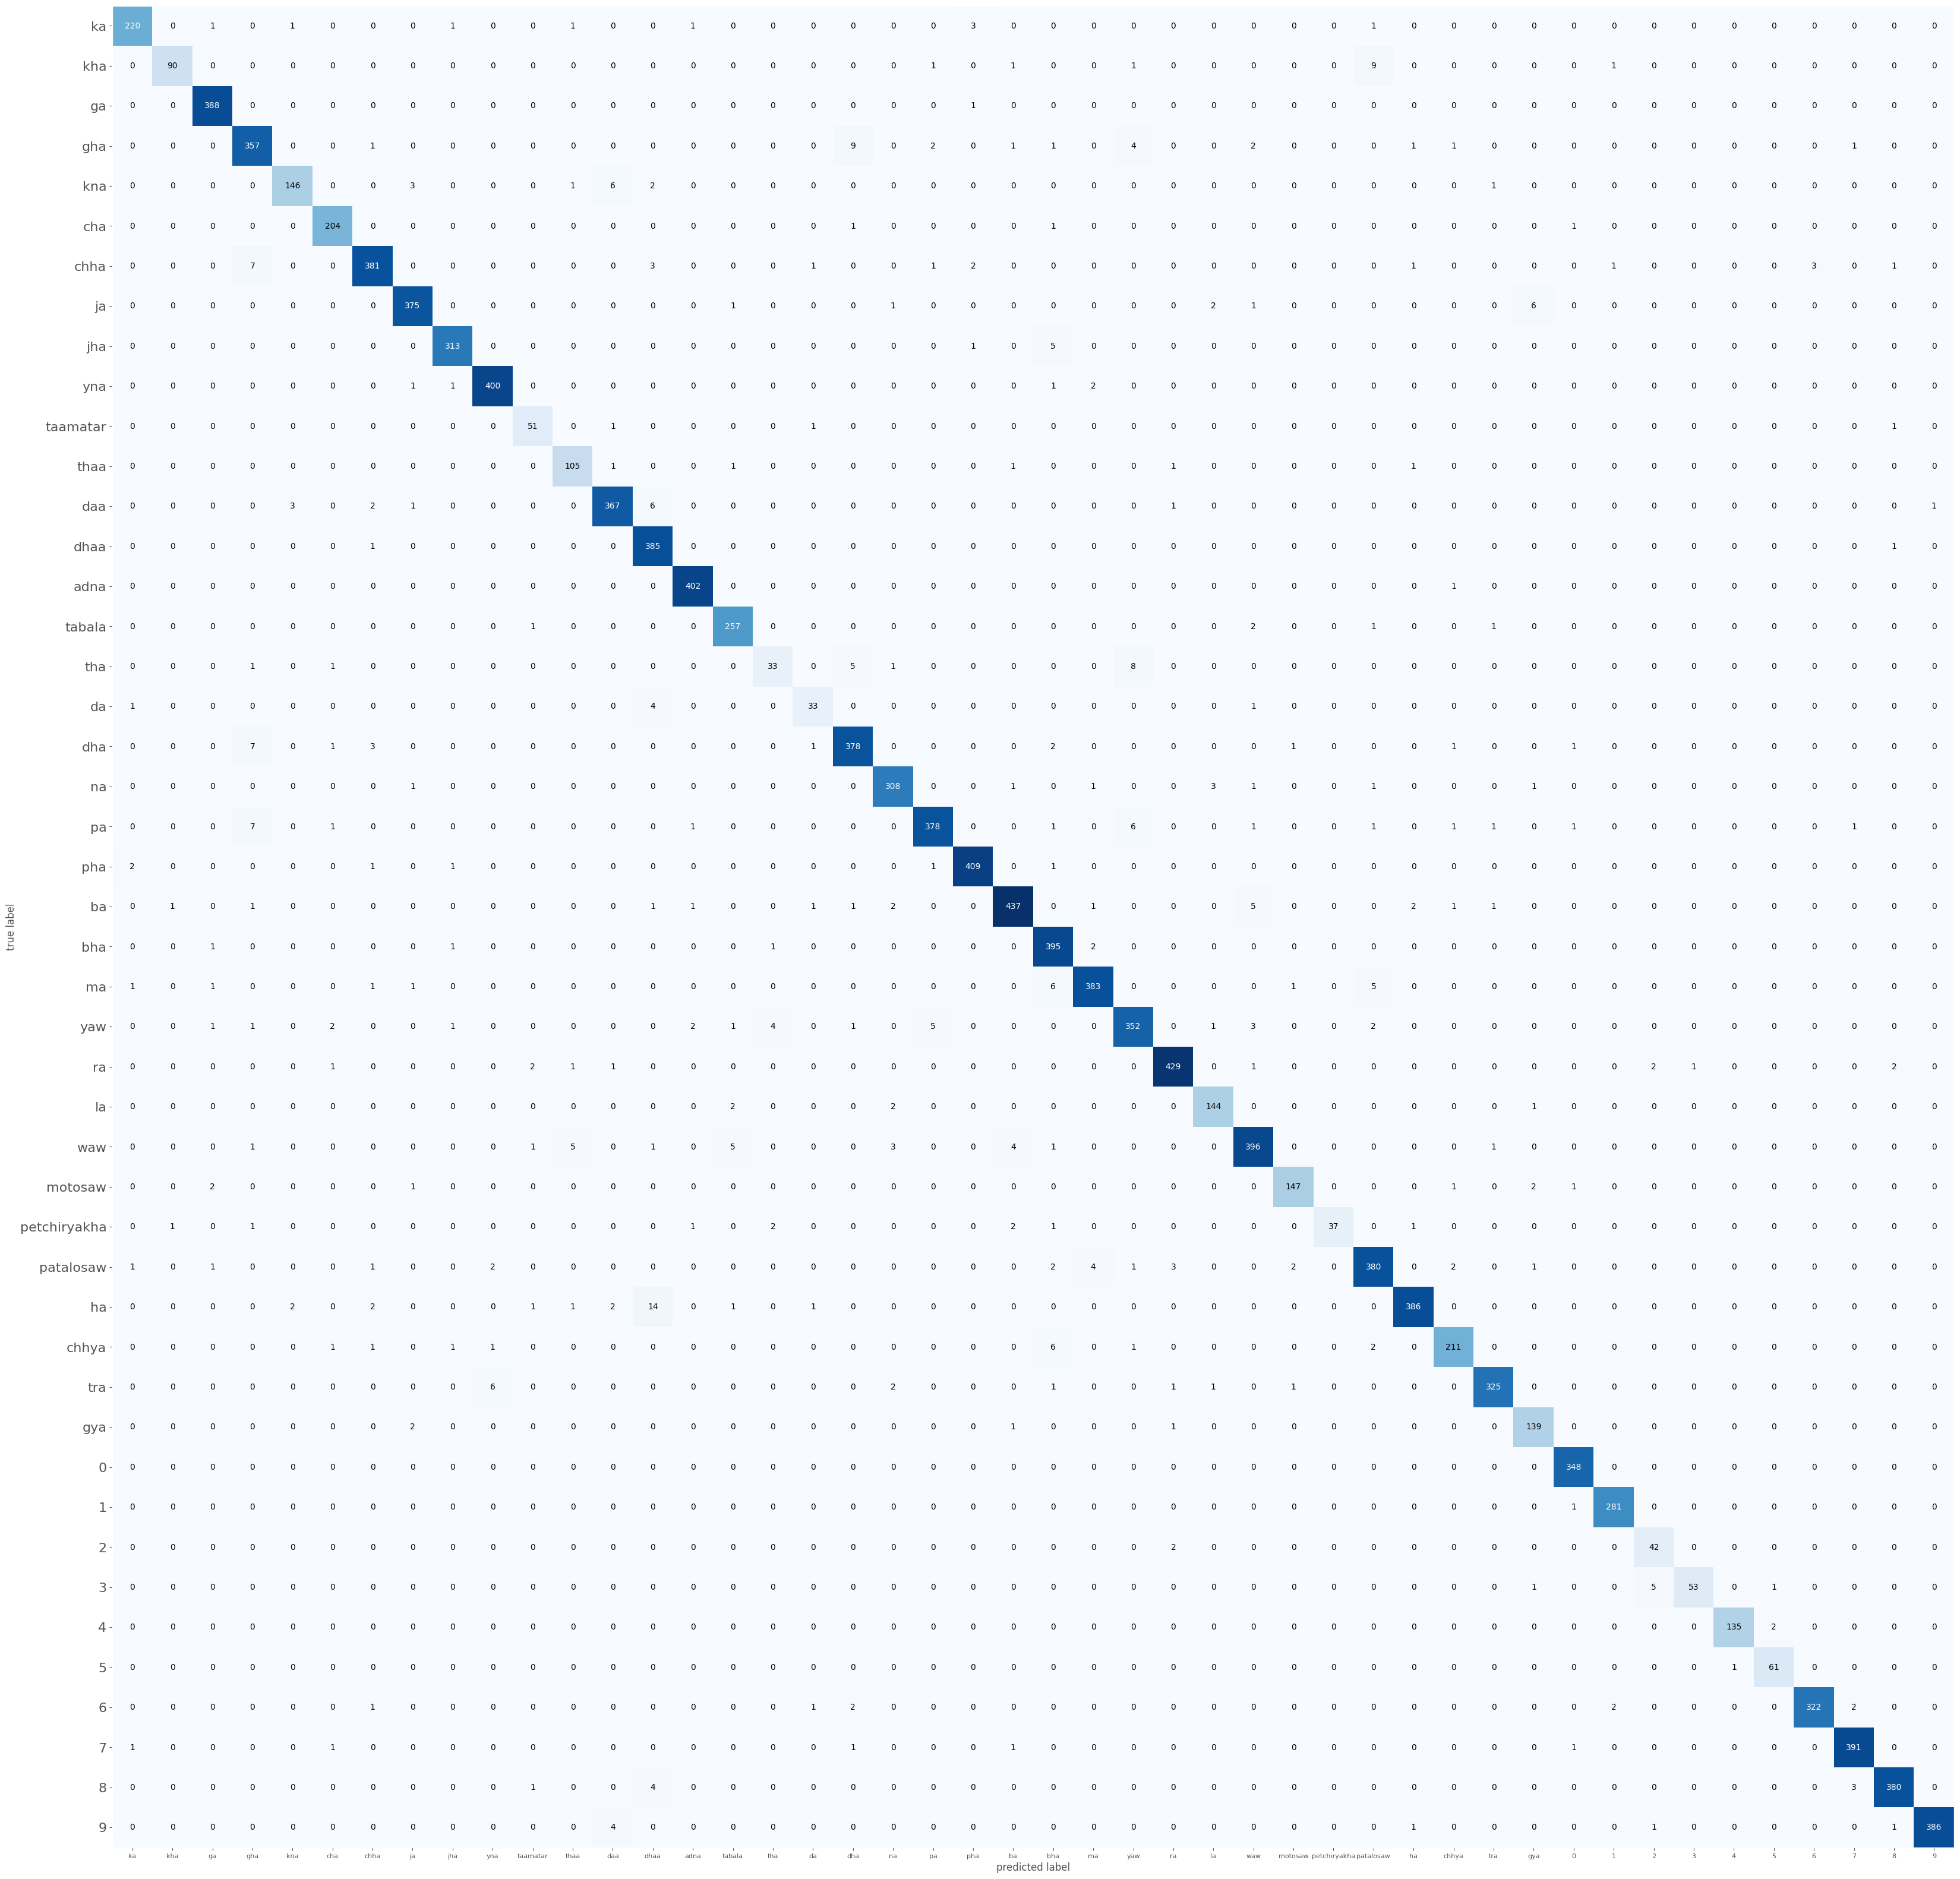

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score,accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from mlxtend.plotting import plot_confusion_matrix
test_labels = np.argmax(yTest, axis=1)
predictions = model.predict(xTest)
predictions = np.argmax(predictions, axis=-1)
cm = confusion_matrix(test_labels, predictions)
plt.figure()
plot_confusion_matrix(cm,figsize=(40,50), hide_ticks=True,cmap=plt.cm.Blues)
plt.xticks(range(len(labels)),labels, fontsize=8)
plt.yticks(range(len(labels)),labels, fontsize=16)
plt.savefig("/content/drive/My Drive/DevnagariCharacterDetection/Figures/LSTM2adamConfusion")

In [ ]:
FP = cm.sum(axis=0) - np.diag(cm)
FN = cm.sum(axis=1) - np.diag(cm)
TP = np.diag(cm)
TN = cm.sum() - (FP + FN + TP)

# # Sensitivity, hit rate, recall, or true positive rate
# TPR = TP/(TP+FN)
# # Specificity or true negative rate
# TNR = TN/(TN+FP)
# # Precision or positive predictive value
# PPV = TP/(TP+FP)
# # Negative predictive value
# NPV = TN/(TN+FN)
# # Fall out or false positive rate
# FPR = FP/(FP+TN)
# # False negative rate
# FNR = FN/(TP+FN)
# # False discovery rate
# FDR = FP/(TP+FP)

# # Overall accuracy
# ACC = (TP+TN)/(TP+FP+FN+TN)
# print(ACC)

# avg=np.average(ACC)
# print(f"\n Average Accuracy: {avg*100}")

label_metrics = {}
for i in range(len(folders)):
    label = Folders[i]  # Assuming Folders contains label names
    TP = cm[i, i]
    FP = np.sum(cm[:, i]) - TP
    FN = np.sum(cm[i, :]) - TP
    TN = np.sum(cm) - TP - FP - FN

    accuracy = (TP + TN) / (TP + TN + FP + FN)
    precision = precision_score(test_labels, predictions, average=None)[i]
    recall = recall_score(test_labels, predictions, average=None)[i]
    f1 = f1_score(test_labels, predictions, average=None)[i]

    label_metrics[label] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

# Print the results
for label, metrics in label_metrics.items():
    print(f"Label: {label}")
    print(f"Accuracy: {metrics['Accuracy']}")
    print(f"Precision: {metrics['Precision']}")
    print(f"Recall: {metrics['Recall']}")
    print(f"F1 Score: {metrics['F1 Score']}")
    print()

accuracy_avg = np.mean([metrics['Accuracy'] for metrics in label_metrics.values()])
precision_avg = np.mean([metrics['Precision'] for metrics in label_metrics.values()])
recall_avg = np.mean([metrics['Recall'] for metrics in label_metrics.values()])
f1_avg = np.mean([metrics['F1 Score'] for metrics in label_metrics.values()])

Label: digit_9
Accuracy: 0.9988444649872891
Precision: 0.9734513274336283
Recall: 0.9606986899563319
F1 Score: 0.967032967032967

Label: digit_8
Accuracy: 0.9988444649872891
Precision: 0.9782608695652174
Recall: 0.8737864077669902
F1 Score: 0.923076923076923

Label: digit_7
Accuracy: 0.9993837146598875
Precision: 0.9822784810126582
Recall: 0.9974293059125964
F1 Score: 0.9897959183673469

Label: digit_6
Accuracy: 0.9962252522918111
Precision: 0.9321148825065274
Recall: 0.9394736842105263
F1 Score: 0.9357798165137614

Label: digit_5
Accuracy: 0.9985363223172329
Precision: 0.9605263157894737
Recall: 0.9182389937106918
F1 Score: 0.9389067524115756

Label: character_34_chhya
Accuracy: 0.9991526076573454
Precision: 0.9622641509433962
Recall: 0.9855072463768116
F1 Score: 0.973747016706444

Label: character_35_tra
Accuracy: 0.997380787304522
Precision: 0.9645569620253165
Recall: 0.9501246882793017
F1 Score: 0.957286432160804

Label: digit_4
Accuracy: 0.9983822509822048
Precision: 0.97402597402

In [ ]:
accuracy_avg


0.9985229248098392

In [ ]:
recall_avg

0.9515157020533288

In [ ]:
precision_avg

0.9573418740637606

In [ ]:
f1_avg

0.9536864803616154

In [1]:
import numpy as np

arr = np.array([[1, 2, 3],
                [4, 5, 6],
                [7, 8, 9]])
print(arr)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [3]:
arr[2,:]

array([7, 8, 9])